## The Android App Market Analysis
 A comprehensive analysis of the Android app market in order to devise strategies to drive growth and retention.
 
Based on datasets from the the Google Play website. 

apps.csv contains all the details of the applications on Google Play. There are 13 features that describe a given app.

In [23]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

apps = pd.read_csv("datasets/apps.csv", index_col=0)

apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
# A random sample of 5 rows
print(apps.sample(5))

                                                 App       Category  Rating  \
359                                     Google Voice  COMMUNICATION     4.2   
7796                  Deck Builder & Analyzer for CR         FAMILY     3.1   
8957                            DV Lottery Simulator         FAMILY     4.6   
7084                               CA Latam Partners       BUSINESS     NaN   
2002  Marble Woka Woka 2018 - Bubble Shooter Match 3           GAME     4.6   

      Reviews  Size     Installs  Type Price Content Rating         Genres  \
359    171031   NaN  10,000,000+  Free     0       Everyone  Communication   
7796       52   9.8       5,000+  Free     0       Everyone  Entertainment   
8957       13   1.3       1,000+  Free     0       Everyone  Entertainment   
7084        0  12.0          10+  Free     0       Everyone       Business   
2002   155186   NaN  10,000,000+  Free     0       Everyone         Puzzle   

          Last Updated         Current Ver         Andro

# Clearing data

Let's turn columns "Installs" and "Price" into purely numeric:

In [25]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    apps[col] = apps[col].astype('float')

print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# Exploring app categories

In [41]:
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()


data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

print('Number of apps in each category:')
plotly.offline.iplot(data)

Number of categories =  33
Number of apps in each category:


# Distribution of app ratings

In [56]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }],
          'title': "Distribution of app ratings",
          'xaxis': {'title': "Rating"},
          'yaxis': {'title': "Number of apps"}
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


# Effect of size of an app

Let's look at the effect of size of an app on it's rating (among bigger categories). 

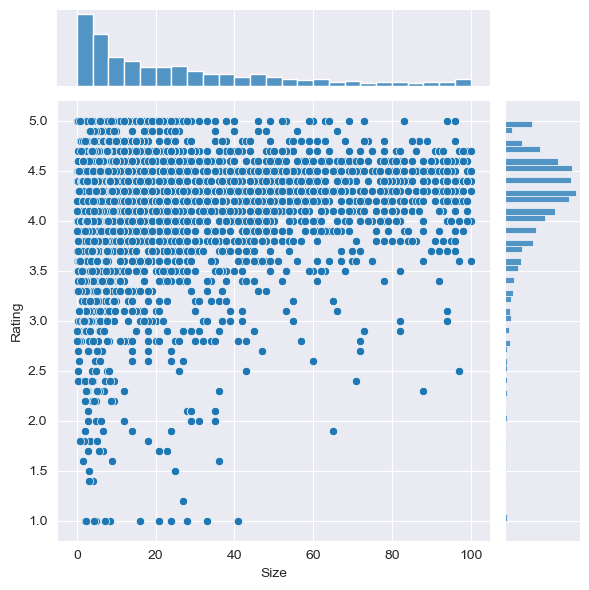

In [79]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(apps['Rating'].isnull() == False) &  (apps['Size'].isnull() == False)]

# Subset for categories with at least 350 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

In [69]:
print("Correlation: ", large_categories['Size'].corr(large_categories['Rating']))

Correlation:  0.0784463666650338


As we can see, there is no significant effect of size on rating.

# Relation between app category and app price

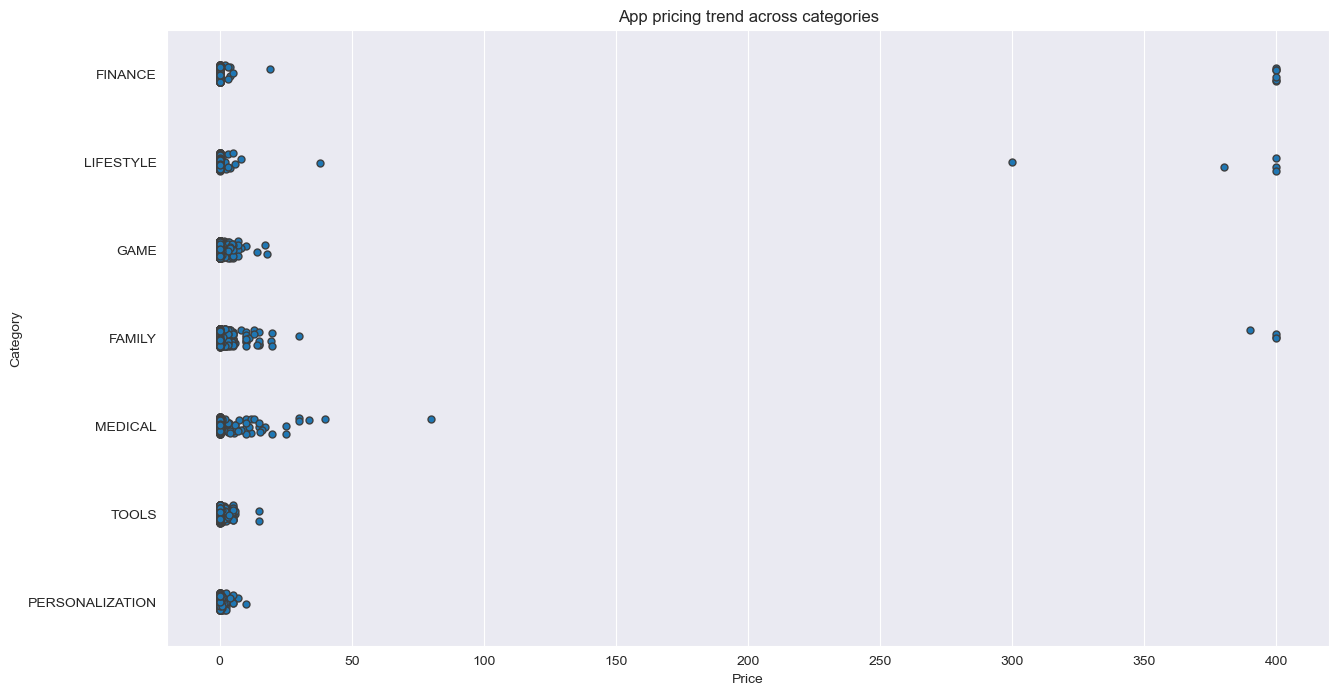

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = large_categories['Price'], y = large_categories['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
plt.show()

There are just a few apps priced above $25. Let's look at them:

In [81]:
apps_above_25 = large_categories[large_categories['Price'] > 25]
apps_above_25[['Category', 'App', 'Price']]

,Category,App,Price
2253,MEDICAL,Vargo Anesthesia Mega App,79.99
2266,MEDICAL,EMT PASS,29.99
2298,MEDICAL,PTA Content Master,29.99
2301,MEDICAL,A Manual of Acupuncture,33.99
2414,MEDICAL,LTC AS Legal,39.99
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99


Based on the names of the expensive apps, most of them are junk. Let's look at the apps in the normal price range:

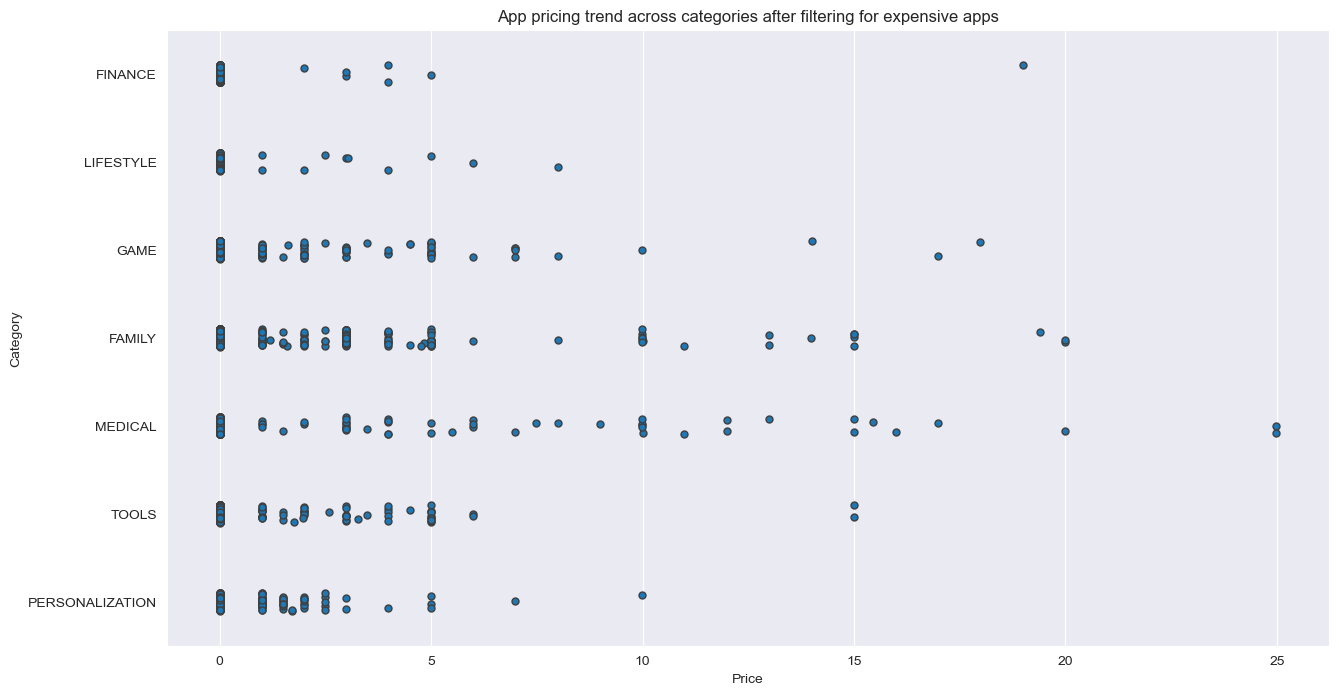

In [82]:
apps_under_25 = large_categories[large_categories["Price"] < 25]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_25, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for expensive apps')
plt.show()

Family and Medical app categories have more apps above $6.

# Effect of price of an app

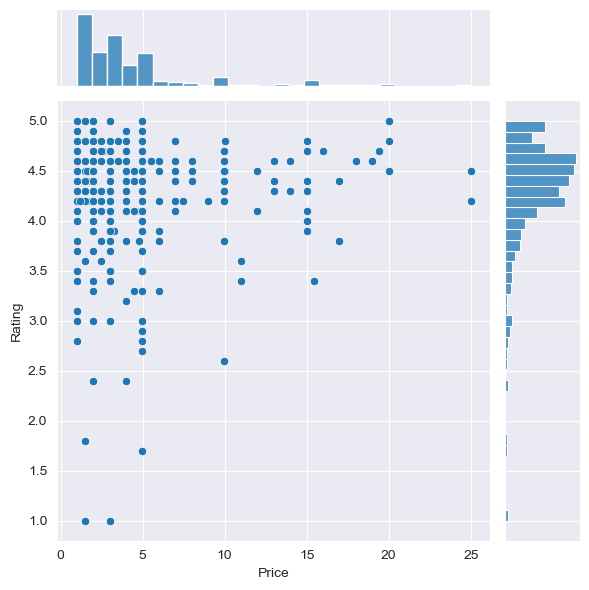

In [83]:
# Select apps whose 'Type' is 'Paid'
paid_apps = apps_under_25[apps_under_25["Type"] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

In [84]:
print("Correlation: ", paid_apps['Price'].corr(paid_apps['Rating']))

Correlation:  0.011925921116381489


As we can see, there is no significant effect of price on rating.

# Popularity of paid apps vs free apps

Now, lets examine if free apps are being downloaded much more often than paid apps:

In [85]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Free apps are way more popular. Median and 3rd quartile are 100 times greater.